# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Kaggle = https://www.kaggle.com/datasets/ayessa/salary-prediction-classification


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
files = files.upload()

df = pd.read_csv('salary.csv')
df.head()

Saving salary.csv to salary (1).csv


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# Memeriksa informasi umum

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.shape

(32561, 15)

In [7]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [8]:
df.duplicated().sum()

np.int64(24)

In [9]:
df.corr(numeric_only=True)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


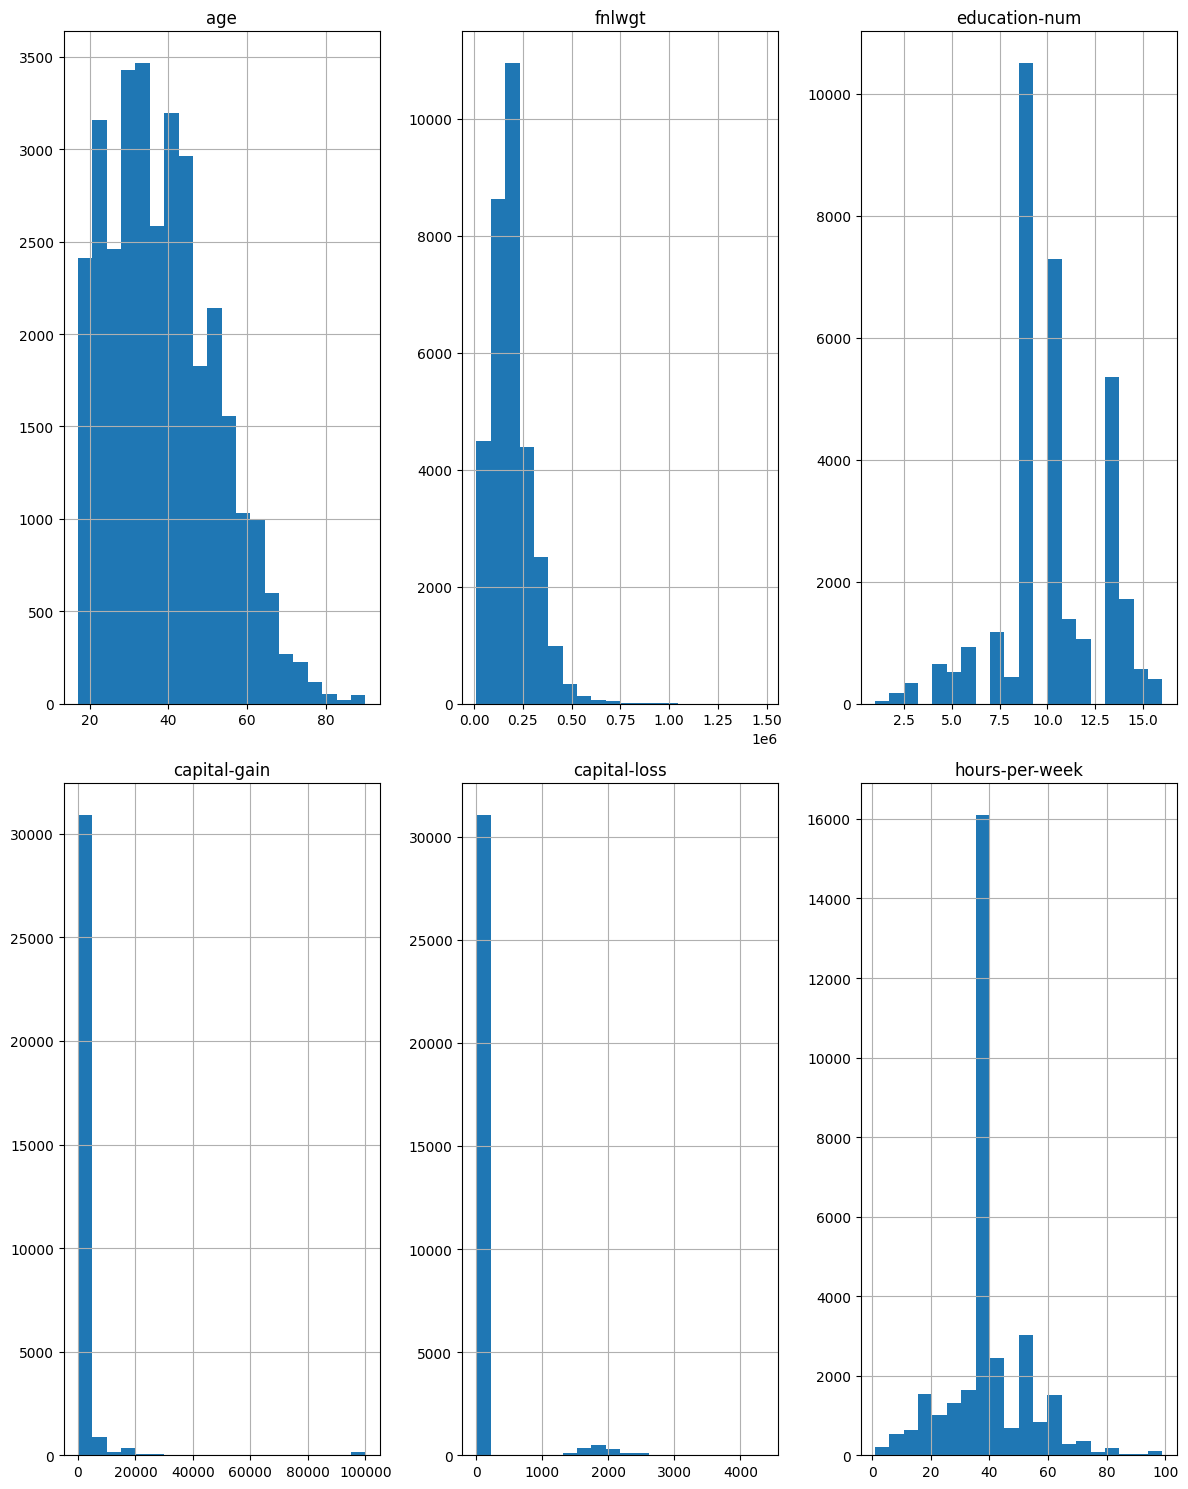

In [10]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

num_cols = len(numerical_cols)
plots_per_figure = 6 # 2 rows * 3 columns
num_figures = (num_cols + plots_per_figure - 1) // plots_per_figure # ceiling division

for fig_idx in range(num_figures):
    plt.figure(figsize=(12, 15)) # Create a new figure for each set of plots
    start_index = fig_idx * plots_per_figure
    end_index = min((fig_idx + 1) * plots_per_figure, num_cols)

    for i, col_idx in enumerate(range(start_index, end_index)):
        col = numerical_cols[col_idx]
        plt.subplot(2, 3, i + 1) # i + 1 because subplot index is 1-based
        df[col].hist(bins=20)
        plt.title(col)
    plt.tight_layout()
    plt.show()

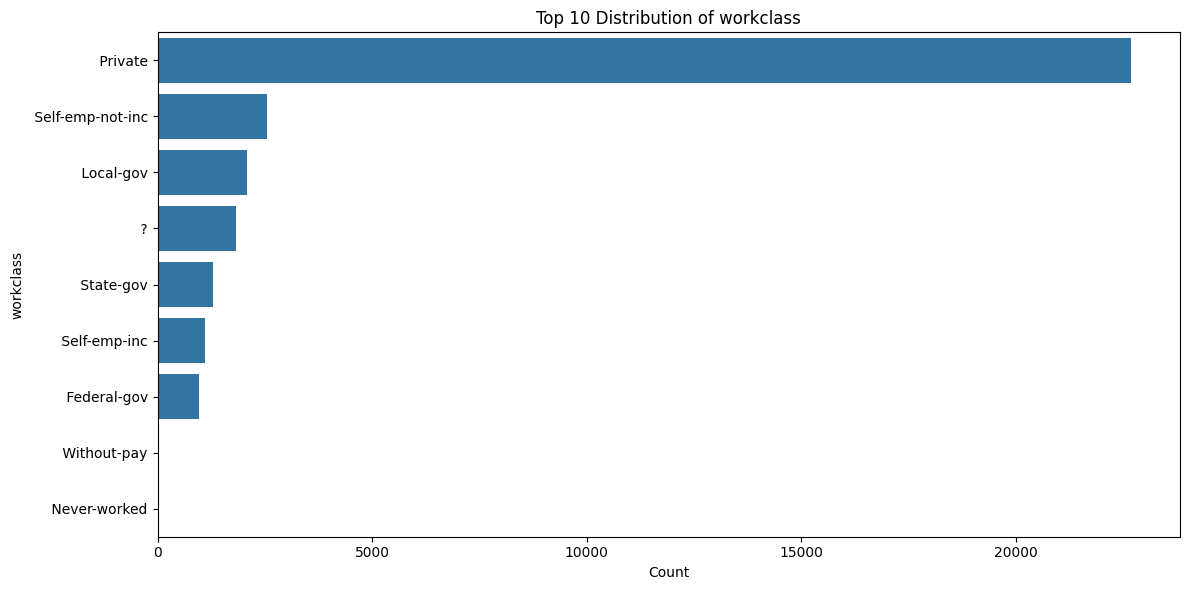

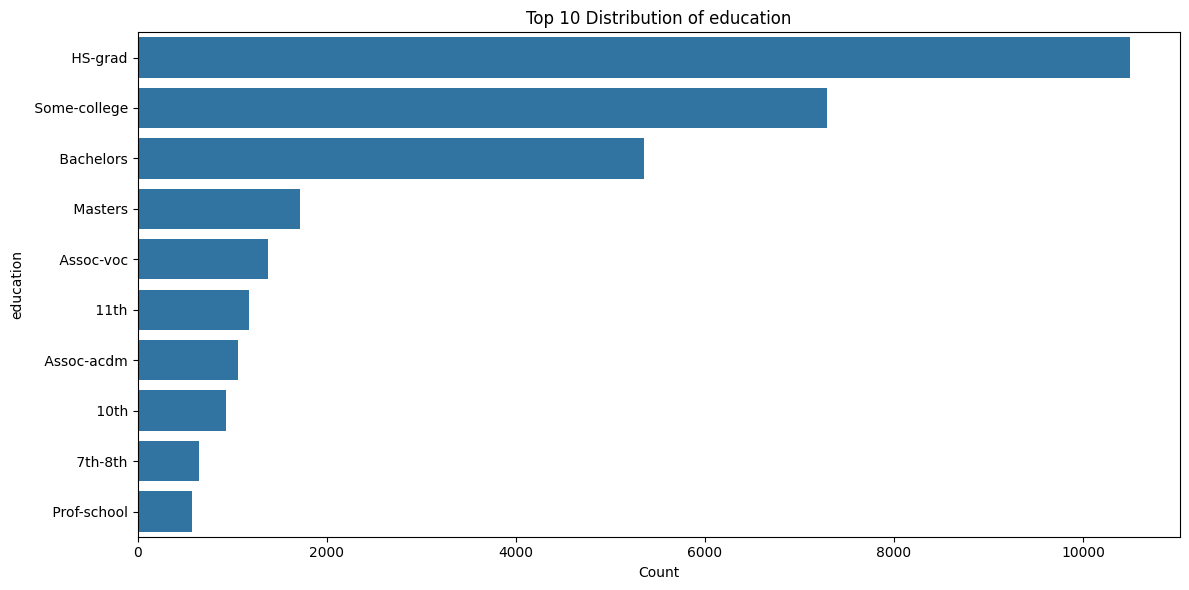

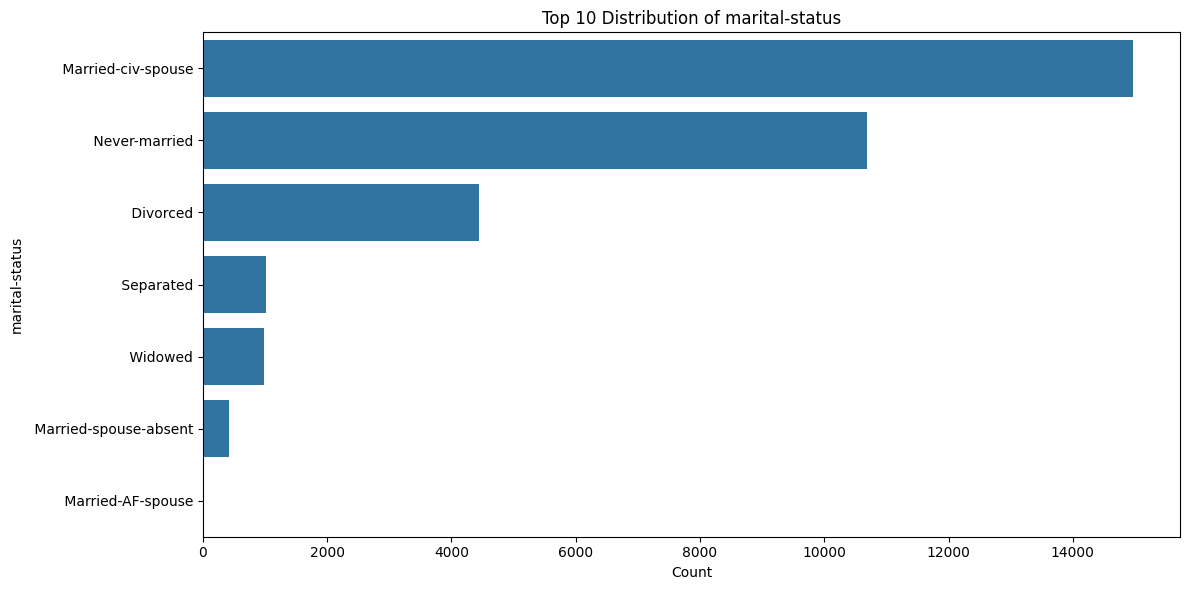

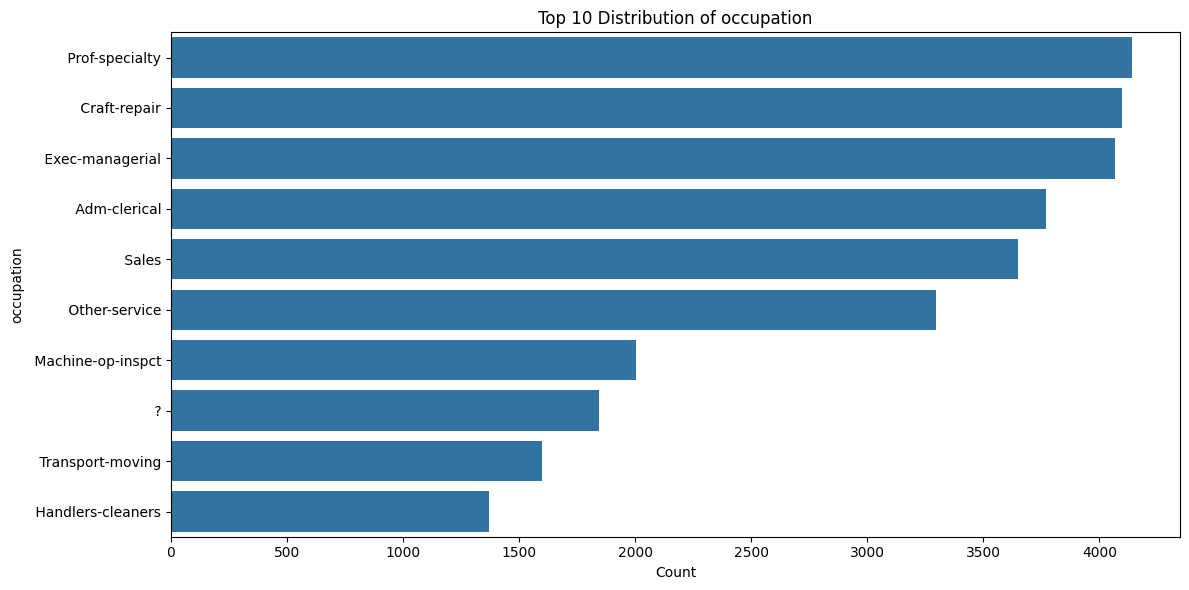

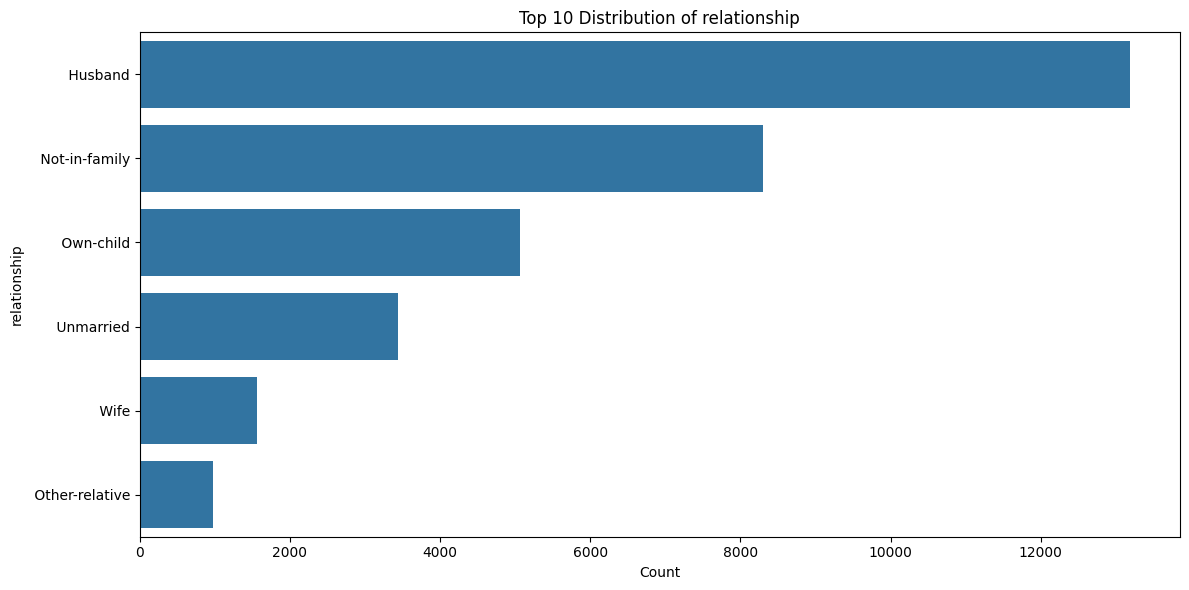

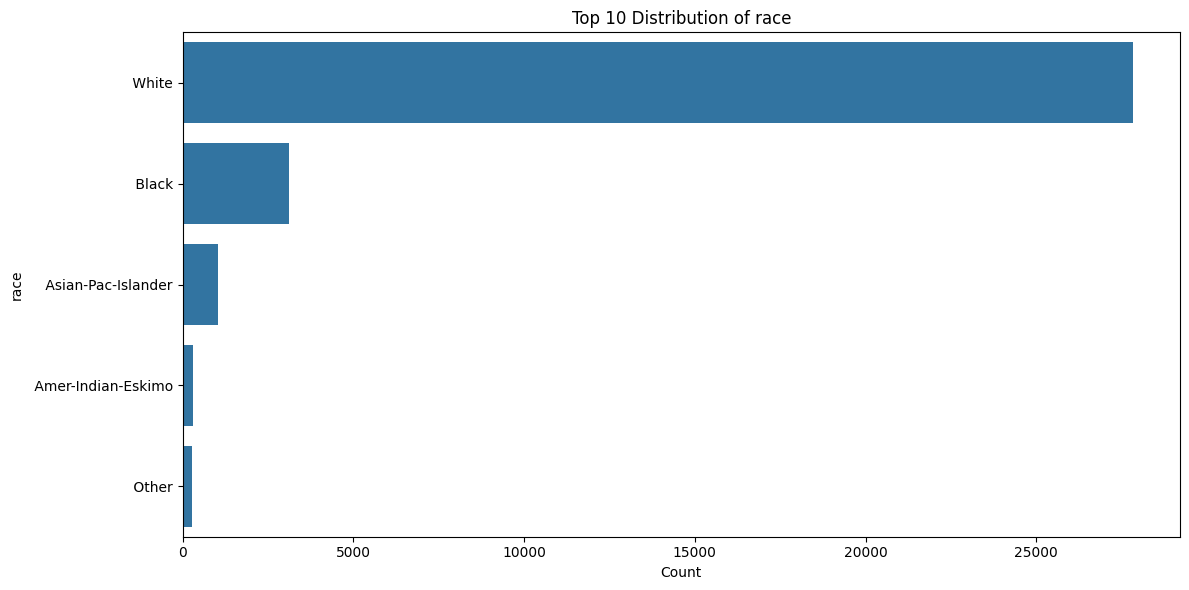

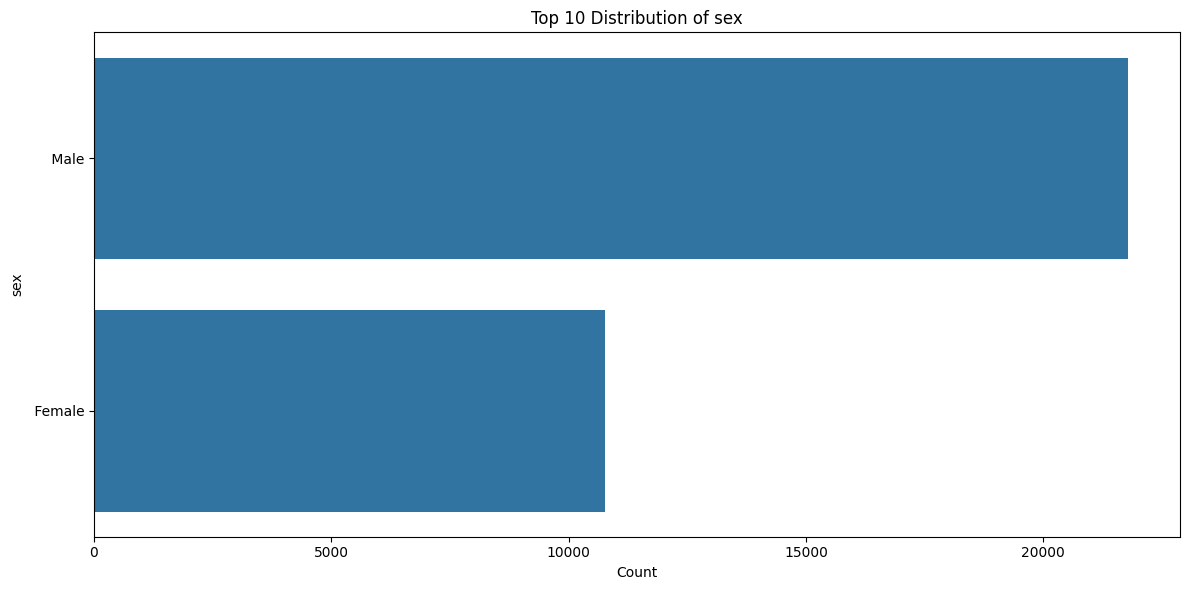

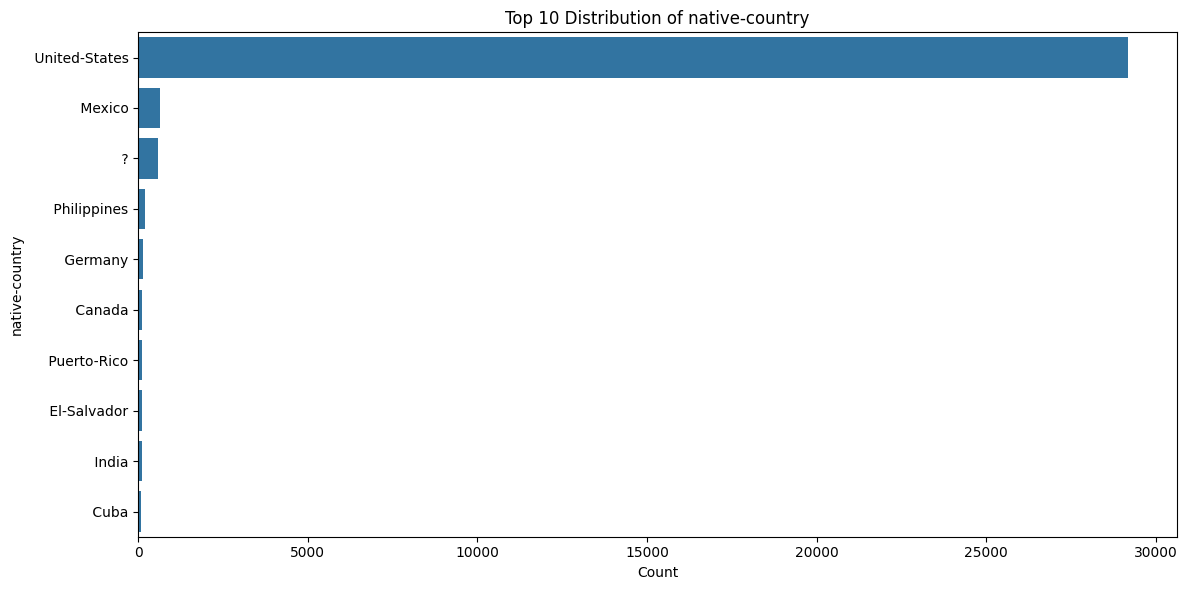

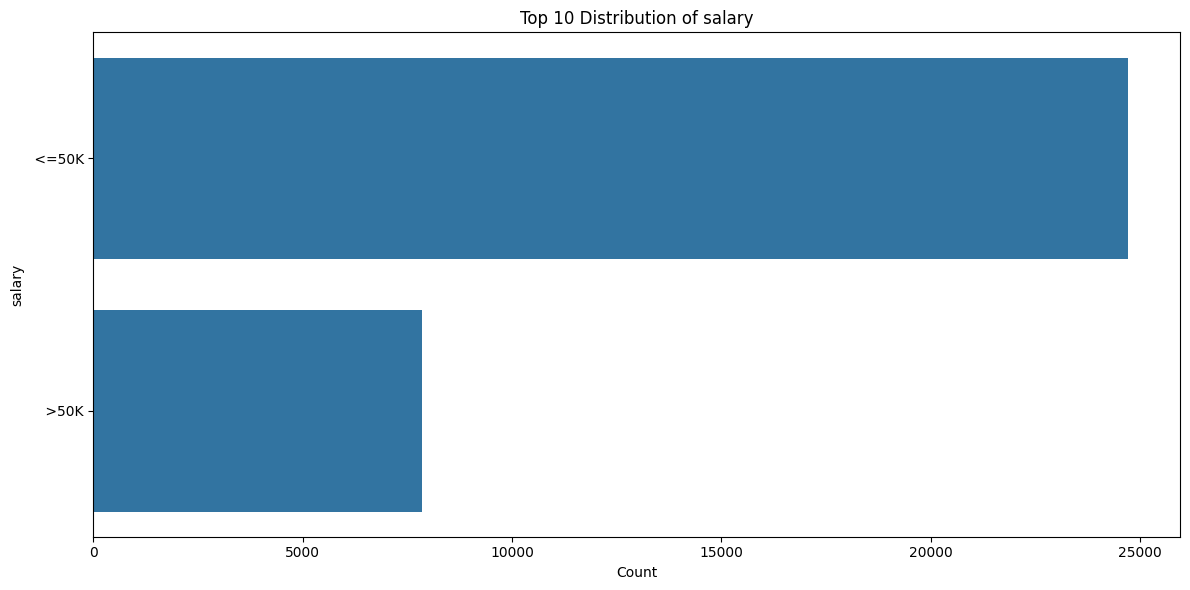

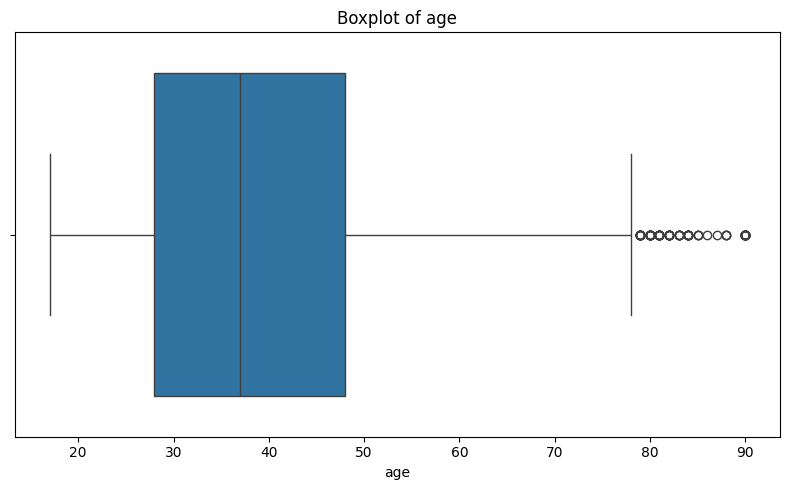

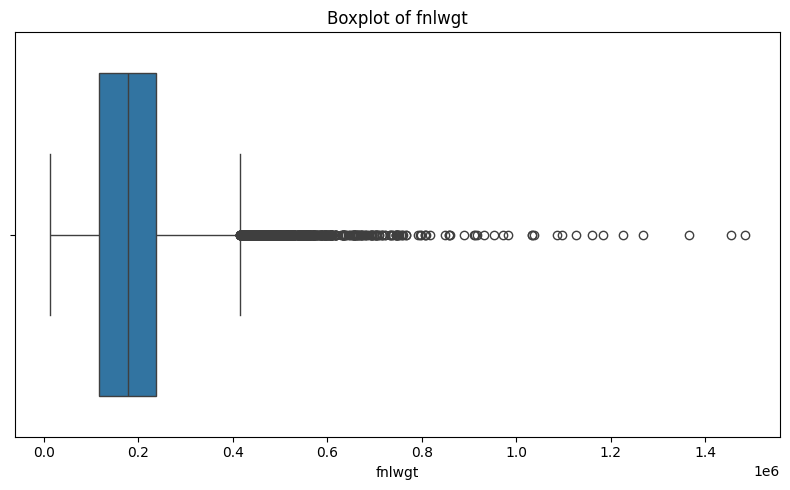

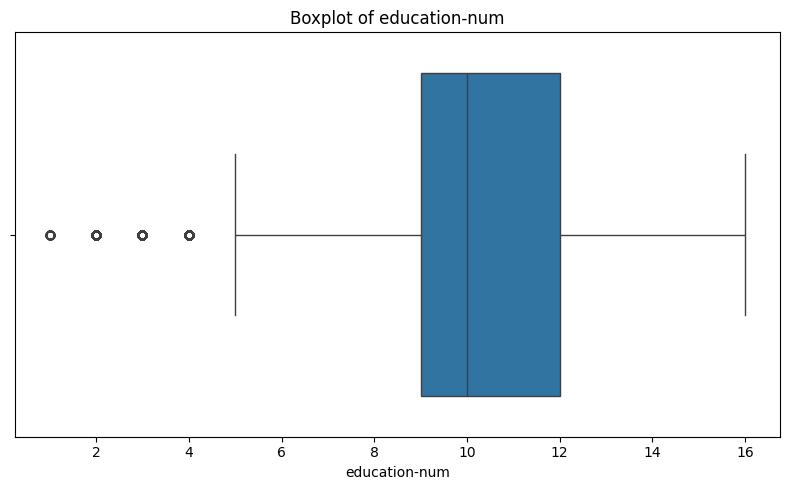

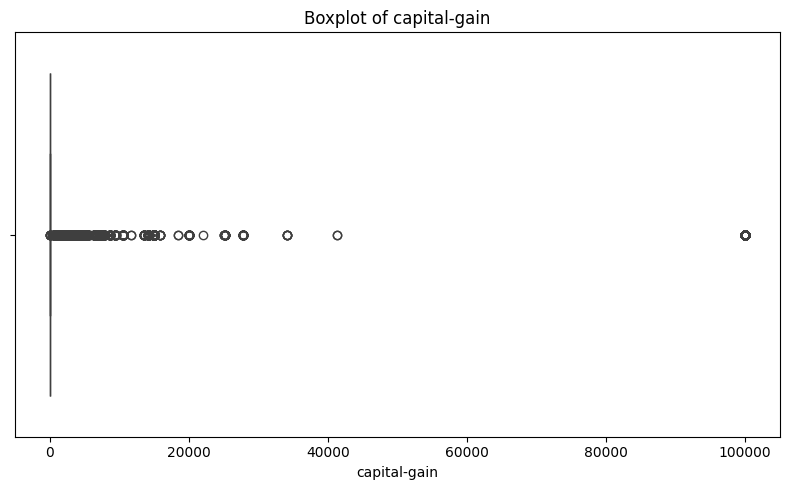

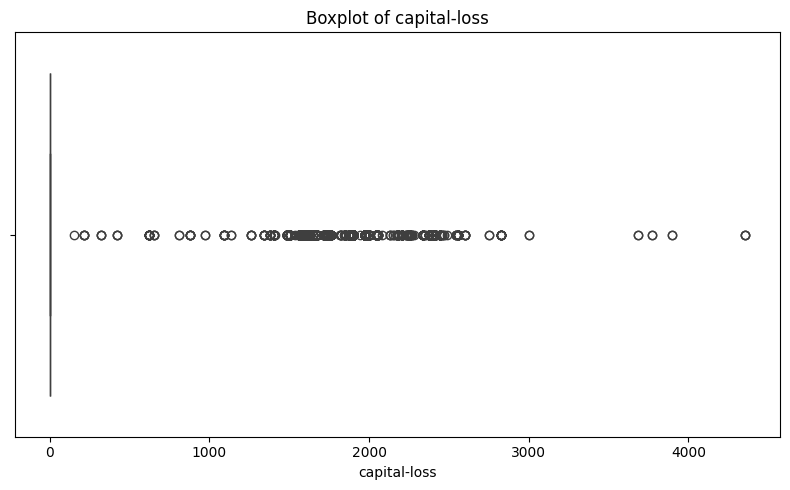

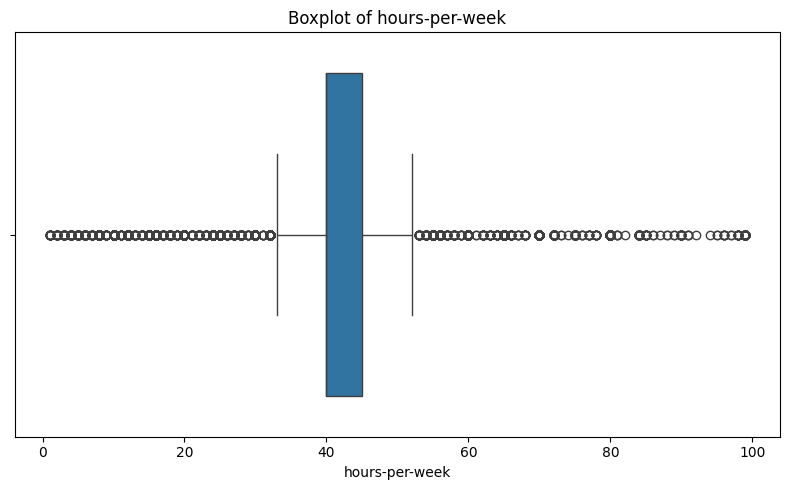

In [11]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols :
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10])
    plt.title(f'Top 10 Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    # Skip columns that are entirely NaN, as boxplot cannot be generated for them
    if df[col].isnull().all():
        print(f"Skipping boxplot for '{col}' as it contains only NaN values.")
        continue
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

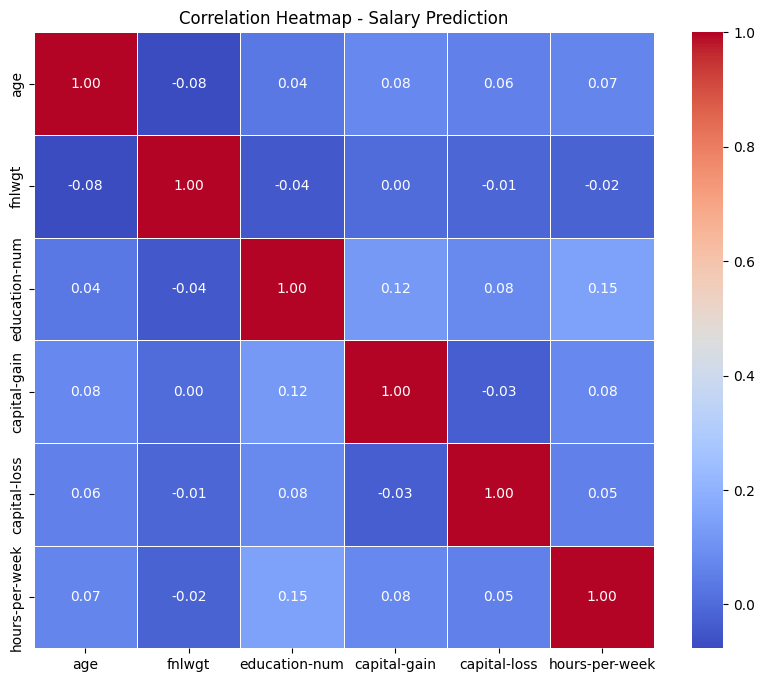

In [12]:
# Corr Heatmap

corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Heatmap - Salary Prediction')
plt.show()

In [13]:
categorical_cols = df.select_dtypes(include=['object']).columns

for i in categorical_cols:
  col_unique = df[i].unique()
  print(col_unique)

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' 

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [14]:
# Menghapus kolom yang tidak diperlukan

df = df.drop(['relationship', 'native-country', 'fnlwgt', 'capital-gain', 'capital-loss'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   hours-per-week  32561 non-null  int64 
 9   salary          32561 non-null  object
dtypes: int64(3), object(7)
memory usage: 2.5+ MB


In [15]:
# Menghapus duplikat

df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [16]:
# Normalisasi

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for i in numerical_cols:
  df[i] = scaler.fit_transform(df[[i]])

df.head()

,age,workclass,education,education-num,marital-status,occupation,race,sex,hours-per-week,salary
0,-0.051555,State-gov,Bachelors,1.083593,Never-married,Adm-clerical,White,Male,-0.053081,<=50K
1,0.748382,Self-emp-not-inc,Bachelors,1.083593,Married-civ-spouse,Exec-managerial,White,Male,-2.116736,<=50K
2,-0.124276,Private,HS-grad,-0.405360,Divorced,Handlers-cleaners,White,Male,-0.053081,<=50K
3,0.966546,Private,11th,-1.149836,Married-civ-spouse,Handlers-cleaners,Black,Male,-0.053081,<=50K
4,-0.851492,Private,Bachelors,1.083593,Married-civ-spouse,Prof-specialty,Black,Female,-0.053081,<=50K


In [17]:
# Menghapus ? dan 'Without-pay' pada kolom Workclass

values_to_remove = ['?', 'Without-pay']
df = df[~df['workclass'].isin(values_to_remove)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26860 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             26860 non-null  float64
 1   workclass       26860 non-null  object 
 2   education       26860 non-null  object 
 3   education-num   26860 non-null  float64
 4   marital-status  26860 non-null  object 
 5   occupation      26860 non-null  object 
 6   race            26860 non-null  object 
 7   sex             26860 non-null  object 
 8   hours-per-week  26860 non-null  float64
 9   salary          26860 non-null  object 
dtypes: float64(3), object(7)
memory usage: 2.3+ MB


In [18]:
# Melakukan binning pada workclass, education, dan marital-status
# Mapping setiap kategori terlebih dahulu

workclass_mapping = {
    'State-gov': 'Gov',
    'Federal-gov': 'Gov',
    'Local-gov': 'Gov',
    'Self-emp-inc': 'Self-emp',
    'Self-emp-not-inc': 'Self-emp',
    'Private': 'Private',
  }

education_mapping = {
    'Bachelors': 'High',
    'Masters': 'High',
    'Doctorate': 'High',
    'Prof-school': 'High',
    'Assoc-acdm': 'Medium',
    'HS-grad': 'Medium',
    'Assoc-voc': 'Medium',
    '12th': 'Medium',
    'Some-college': 'Medium',
    '11th': 'Low',
    '9th': 'Low',
    '7th-8th': 'Low',
    '5th-6th': 'Low',
    '10th': 'Low',
    '1st-4th': 'Low',
    'Preschool': 'Low'
  }

marital_status = {
      'Married-civ-spouse': 'Married',
      'Married-spouse-absent': 'Married',
      'Married-AF-spouse': 'Married',
      'Never-married': 'Single',
      'Divorced': 'Single',
      'Separated': 'Single',
      'Widowed': 'Single'
  }

In [19]:
df['workclass'] = df['workclass'].str.strip()
df['education'] = df['education'].str.strip()
df['marital-status'] = df['marital-status'].str.strip()

df['workclass_bin'] = df['workclass'].map(workclass_mapping)
df['education_bin'] = df['education'].map(education_mapping)
df['marital-status_bin'] = df['marital-status'].map(marital_status)

df.head()

,age,workclass,education,education-num,marital-status,occupation,race,sex,hours-per-week,salary,workclass_bin,education_bin,marital-status_bin
0,-0.051555,State-gov,Bachelors,1.083593,Never-married,Adm-clerical,White,Male,-0.053081,<=50K,Gov,High,Single
1,0.748382,Self-emp-not-inc,Bachelors,1.083593,Married-civ-spouse,Exec-managerial,White,Male,-2.116736,<=50K,Self-emp,High,Married
2,-0.124276,Private,HS-grad,-0.405360,Divorced,Handlers-cleaners,White,Male,-0.053081,<=50K,Private,Medium,Single
3,0.966546,Private,11th,-1.149836,Married-civ-spouse,Handlers-cleaners,Black,Male,-0.053081,<=50K,Private,Low,Married
4,-0.851492,Private,Bachelors,1.083593,Married-civ-spouse,Prof-specialty,Black,Female,-0.053081,<=50K,Private,High,Married


In [20]:
from sklearn.preprocessing import LabelEncoder

LabelEncoder = LabelEncoder()

encoded = [
  'workclass_bin', 'education_bin', 'marital-status_bin', 'salary', 'race', 'sex', 'occupation'
]

for i in encoded:
  df[i] = LabelEncoder.fit_transform(df[i])

df.head()

,age,workclass,education,education-num,marital-status,occupation,race,sex,hours-per-week,salary,workclass_bin,education_bin,marital-status_bin
0,-0.051555,State-gov,Bachelors,1.083593,Never-married,1,4,1,-0.053081,0,0,0,1
1,0.748382,Self-emp-not-inc,Bachelors,1.083593,Married-civ-spouse,4,4,1,-2.116736,0,2,0,0
2,-0.124276,Private,HS-grad,-0.405360,Divorced,6,4,1,-0.053081,0,1,2,1
3,0.966546,Private,11th,-1.149836,Married-civ-spouse,6,2,1,-0.053081,0,1,1,0
4,-0.851492,Private,Bachelors,1.083593,Married-civ-spouse,10,2,0,-0.053081,0,1,0,0


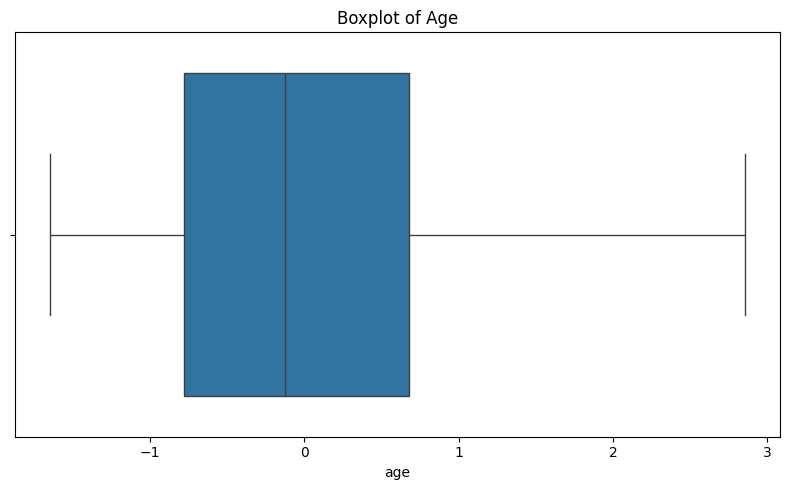

In [21]:
# Handling outlier 'Age'

Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='age')
plt.title(f'Boxplot of Age')
plt.xlabel('age')
plt.tight_layout()
plt.show()

In [22]:
df_new = df.drop(['workclass', 'education', 'marital-status'], axis=1)

df_new.head()

,age,education-num,occupation,race,sex,hours-per-week,salary,workclass_bin,education_bin,marital-status_bin
0,-0.051555,1.083593,1,4,1,-0.053081,0,0,0,1
1,0.748382,1.083593,4,4,1,-2.116736,0,2,0,0
2,-0.124276,-0.405360,6,4,1,-0.053081,0,1,2,1
3,0.966546,-1.149836,6,2,1,-0.053081,0,1,1,0
4,-0.851492,1.083593,10,2,0,-0.053081,0,1,0,0


In [23]:
df_new.to_csv('salary_preprocessing.csv')